In [77]:
from math import sqrt, pi, e

import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

### Books Utilized
-Linear Algebra: Learning from Data by Gilbert Strang

In [7]:
# Random fresh ages (Strang p.266)
random_freshmen_age = np.array([18, 17, 18, 19, 17])
random_freshmen_prob = np.array([.2, .5, .3]) # corresponding to 17->20%, 18->50%, 19->30%

# Column vectors which are where transpose operation are automatically 
#taken care of. If shape is (?,1) then manual transposes are needed (e.g. x.T * x).
print("Freshmen age column vector shape: {}"
      .format(random_freshmen_age.shape))
print("Freshmen probability column vector shape: {}"
      .format(random_freshmen_prob.shape))

Freshmen age column vector shape: (5,)
Freshmen probability column vector shape: (3,)


 - Sample Variance: The measure of squared distance from the sample mean. Typically, statisticians will divided by n-1 to account the "actual" degrees of freedom. For example, in the  random freshmen ages example, if we compute the sum of 18, 17, 18, and 19 the the last variable $x$ is determined (dependent on the previous independent numbers), $x$ must be 17 to compute a mean of 17.8. Of course, if the mean was different then the last variable $x$ would not be 17. I like to think about this in a combinatorics sense. Let's say I have 5 balls and I have select 5 of them without replacement. By the time I have selected 4 balls (in any order) I can only choose one ball (dependent on the previous balls), I have no other options. Degrees of freedom get much more complicated, but this is my general conceptualization.
     - [Degrees of freedom](https://www.thoughtco.com/what-is-a-degree-of-freedom-3126416)
     - [Dimensions and degrees](https://medium.com/datathings/dimensions-and-degrees-of-freedom-8b6125dbbd4a)

In [8]:
def sample_mean(x):
    mean = np.sum(x) / len(x)
    
    return mean

def sample_variance(x):
    '''
        Computes the sample variance (S^2) which measures the actual disatance
        squared from the mean. The denomenator containes len(x) -1 instead of
        len(x) to account one degree of freedom being used.
    '''
    mean = sample_mean(x)
    num = np.sum((x - mean)**2)
    den = (len(x) - 1)
    
    return  num / den 

def variance(x, probs):
    mean = expected_value(x, probs)
    return np.sum(probs.T * (np.unique(x) - mean)**2) # (1,?)*(?,1) = (1,1)
     
def expected_value(x ,probs):
    '''
        Computes the dot product between the probailites of each unique datapoint
        and then sum the corresponding vector to get the expected values of the data.
        
        Example: Row Pricture
             (1xn) * C (nx1) = (nxn)
            probabilites.T (row vector) * x(column vector) = expected values

    '''
    
    return np.sum(probs.T * np.unique(x))


In [13]:
freshmen_sample_mean = sample_mean(random_freshmen_age)
print("Sample mean: {}".format(freshmen_sample_mean))

freshmen_sample_variance = sample_variance(random_freshmen_age)
print("Sample variance: {}".format(freshmen_sample_variance))
print("Standard deviation: {:.5f}".format(sqrt(freshmen_sample_variance)))

freshmen_expected_value = expected_value(random_freshmen_age, random_freshmen_prob)
print("Expected value: {}".format(freshmen_expected_value))

freshmen_variance = variance(random_freshmen_age, random_freshmen_prob)
print("Variance: {:.5f}".format(freshmen_variance))
print("Standard deviation: {:.5f}".format(sqrt(freshmen_variance)))

Sample mean: 17.8
Sample variance: 0.7
Standard deviation: 0.83666
Expected value: 18.1
Variance: 0.49000
Standard deviation: 0.70000


In [14]:
# Law of large numbers: as N increase the sample mean converges to the expected value
def law_of_large_numbers(N=500, step_size=10):
    choices = np.array([0, 1]) # tails or heads
    probs = np.array([.5, .5]) # probability of getting tails or heads
    expected = expected_value(choices, probs)
    display("Expected Value: {}".format(expected))
    for n in range(0, N, step_size):
        flips = np.random.randint(0, 2, size=n)
        mean = sample_mean(flips)
        if n % step_size == 0:
            display("Flip Count: {} Mean: {:.5f}" .format(n, mean))

In [15]:
# press 'ESC + o' to hide output
law_of_large_numbers()

'Expected Value: 0.5'

/home/ben/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in long_scalars



'Flip Count: 0 Mean: nan'

'Flip Count: 10 Mean: 0.20000'

'Flip Count: 20 Mean: 0.55000'

'Flip Count: 30 Mean: 0.40000'

'Flip Count: 40 Mean: 0.50000'

'Flip Count: 50 Mean: 0.62000'

'Flip Count: 60 Mean: 0.41667'

'Flip Count: 70 Mean: 0.52857'

'Flip Count: 80 Mean: 0.45000'

'Flip Count: 90 Mean: 0.53333'

'Flip Count: 100 Mean: 0.47000'

'Flip Count: 110 Mean: 0.50909'

'Flip Count: 120 Mean: 0.53333'

'Flip Count: 130 Mean: 0.49231'

'Flip Count: 140 Mean: 0.48571'

'Flip Count: 150 Mean: 0.49333'

'Flip Count: 160 Mean: 0.45625'

'Flip Count: 170 Mean: 0.48824'

'Flip Count: 180 Mean: 0.48333'

'Flip Count: 190 Mean: 0.48947'

'Flip Count: 200 Mean: 0.52000'

'Flip Count: 210 Mean: 0.47619'

'Flip Count: 220 Mean: 0.49091'

'Flip Count: 230 Mean: 0.51739'

'Flip Count: 240 Mean: 0.52500'

'Flip Count: 250 Mean: 0.47200'

'Flip Count: 260 Mean: 0.53462'

'Flip Count: 270 Mean: 0.48519'

'Flip Count: 280 Mean: 0.49286'

'Flip Count: 290 Mean: 0.52759'

'Flip Count: 300 Mean: 0.51333'

'Flip Count: 310 Mean: 0.50645'

'Flip Count: 320 Mean: 0.45937'

'Flip Count: 330 Mean: 0.54848'

'Flip Count: 340 Mean: 0.52059'

'Flip Count: 350 Mean: 0.49429'

'Flip Count: 360 Mean: 0.51667'

'Flip Count: 370 Mean: 0.48378'

'Flip Count: 380 Mean: 0.48684'

'Flip Count: 390 Mean: 0.48718'

'Flip Count: 400 Mean: 0.49500'

'Flip Count: 410 Mean: 0.53415'

'Flip Count: 420 Mean: 0.52857'

'Flip Count: 430 Mean: 0.46279'

'Flip Count: 440 Mean: 0.51818'

'Flip Count: 450 Mean: 0.50222'

'Flip Count: 460 Mean: 0.51087'

'Flip Count: 470 Mean: 0.48511'

'Flip Count: 480 Mean: 0.48125'

'Flip Count: 490 Mean: 0.51020'

## Continuous Probability Distributions

### Cumulative Distribution $F(x)$

- Cumulative distributions represent the probability that a value is below a particular $x$.In other words, the probabilities are summed up to the given $x$.

In [16]:
def f(x):
    '''Cumulative function for ages between 17 <= x <= 20
        
        Returns:
            The porbability x is below a number between 17 <= x <= 20
    '''
    return (1/3)*(x-17)

In [20]:
# Sympy function (allows for symbolic notation to be used)
x = sym.Symbol('x')
age_function = f(x)
print(" f(x)={} where 17 <= x <= 20:".format(age_function))

ages = [17,17.5,18,18.5,19,19.5,20]
cumulative_dist = np.zeros((len(ages),2))

for i,age in enumerate(np.unique(ages)):
    y =  float(age_function.subs(x, age))
    cumulative_dist[i, :] = [age, y]
cumulative_dist = pd.DataFrame(cumulative_dist, columns = ['Age', 'Prob Below x'])
cumulative_dist

 f(x)=0.333333333333333*x - 5.66666666666667 where 17 <= x <= 20:


Age  Prob Below x
0  17.0      0.000000
1  17.5      0.166667
2  18.0      0.333333
3  18.5      0.500000
4  19.0      0.666667
5  19.5      0.833333
6  20.0      1.000000

You can see that at the age of 20 there is 100% probable that someone is at least 20. This is because our function represents a range between 17 and 20. Therefore out cumulative distribution is bounded by that range. Likewise, the probability someone is 17 years old is basically 0.

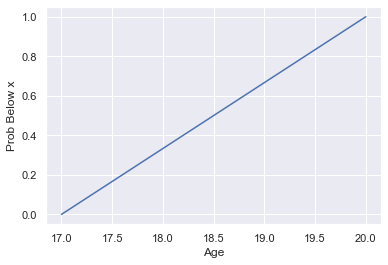

In [100]:
sns.lineplot(x="Age", y="Prob Below x",data=cumulative_dist)

### Probability density function (PDF) $\frac{dF}{dx}$

The derivative of the cumulative distribution leads us to the probability that a sample is near $x$. Since our distribution is continuous we can never say exactly what the probability of $x$, though we can give a narrow range (as if we were being exact). For the freshmen age example our density function turns out to be uniform (our derivative is a constant). We can verify this is correct by looking at the cumulative graph. Here every whole age (18,19, and 20) increases by $\frac{1}{3}$. Of course, we start to see discontinuities between the cumulative and pdf distributions if we look at 17.5 or 18.5. This is because we can never look exactly at the probability of $x$ (remember we can only look at a range).

In [101]:
pdf_age_function= sym.diff(age_function)
ages = [17,17.5,18,18.5,19,19.5,20]
pdf_dist = np.zeros((len(ages),2))
print(" f'(x)={} where 17 <= x <= 20:".format(pdf_age_function))

for i,age in enumerate(np.unique(ages)):
    y =  float(pdf_age_function)
    pdf_dist[i, :] = [age, y]
pdf_dist = pd.DataFrame(pdf_dist, columns = ['Age', 'Prob Near x'])
pdf_dist

 f'(x)=0.333333333333333 where 17 <= x <= 20:


Age  Prob Near x
0  17.0     0.333333
1  17.5     0.333333
2  18.0     0.333333
3  18.5     0.333333
4  19.0     0.333333
5  19.5     0.333333
6  20.0     0.333333

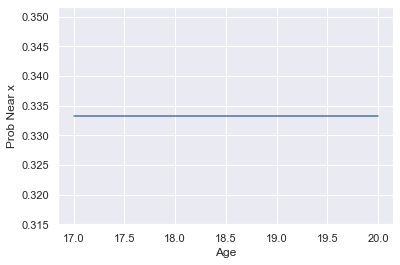

In [102]:
sns.lineplot(x="Age", y="Prob Near x", data=pdf_dist)

### Normal Distribution
$$
\large
\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{(\mu-x)^2}{2\sigma^2}}
$$

In [57]:
from math import exp
from scipy.stats import norm
def normal_dist(x, mu, sigma):
    mu = np.full(x.shape, mu)
    sigma = np.full(x.shape, sigma)
    return (1/(np.sqrt(2*np.pi))*sigma) * np.exp(-(x - mu)**2/(2*sigma**2))

In [65]:
x = np.array(4)
display("Check - Ours: {} Scipy: {}".format(normal_dist(x,0,1), norm.pdf(x)))
assert normal_dist(x,0,1) == norm.pdf(x)

'Check - Ours: 0.00013383022576488537 Scipy: 0.00013383022576488537'

In [73]:
def random_normal(n, mu=0, sigma=1, low=-5, high=5):
    x = np.random.uniform(low, high, n)
    y = normal_dist(x, mu, sigma)
    return x, y
x,y = random_normal(100)

In [80]:
trace = {
    "x": x,
    "y": y,
    "marker": {"color": "green", "size" : 7},
    "mode": "markers",
    "name": "Rands",
    "type": "scatter"
}

data = [trace]
layout = {
    "title": "Estimate of Normal Distribtuion",
    "xaxis": {"title": "Random numbers"},
    "yaxis": {"title": "Probabilities"}
}
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [84]:
np.log([1])

array([0.])